# Boston House Prices

### Introduction



In this notebook I am looking at the well known Boston House Prices dataset. This notebook is broken up into three sections. I will be using Python to:

       1. Explore and describe the dataset.
       2. Investigate whether there is a significant difference in median house
          prices between those on the Charles river and those that aren't.
       3. Create a neural network that can predict the median house price based 
          on the other variables in the dataset.
          
      
***
  

## 1 . The Boston House Prices Dataset

### Background

The data contained in the Boston House Price Dataset was published by David Harrision, Jr. and Daniel L. Rubenfield in 1976 as part of their paper:
 _"Hedonic Housing Prices and the Demand for Clean Air"_ [Ref I JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

In their paper they investigate the problems associated with using housing market data to investigate people's willingness to pay for cleaner air. Their study uses data drawn from the census tracts in the Boston Standard Metrepolitan Statistical Area in 1970. It focuses on a dependent variable, the median value of owner-occupied homes in 506 areas of Boston. 



### Importing and preparing the dataset

I import the Python Libraries for this notebook in the cell below.

In [1]:
# Import of all the python libraries required for this notebook and 
# setting of plotting parameters for the notebook
# Matplotlib had to be upgraded to overcome an issue with heatmaps.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
from scipy import stats

import sklearn.model_selection as mod
from matplotlib import rcParams
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
#pd.options.display.max_rows = None



Using TensorFlow backend.


The dataset is readily available in Python. I imported it from the Sklearn package. I converted it to a dataframe to work with. I also added the dependent variable MDEV to the dataset and called it PRICE, in the cell below.

In [2]:
# import and preparation of the Boston house price dataset for analysis
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# and adapted from Ref II (https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

from sklearn.datasets import load_boston
bostonds = load_boston()  #bostonds is a dictionaray

# Convert to a pandas dataframe
boston = pd.DataFrame(bostonds.data)
# Add the feature_names from the bostonds dictionary as columns
boston.columns = bostonds.feature_names
# Add the target attribute, the price, from the dictionary to the dataframe
boston['MDEV'] = bostonds.target

The dataset contains 506 rows and 14 columns. In the cell below I am running a quick 
check to ensure there are no null values in the data, and there are none.

In [3]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

A look at first few rows of the dataset and what data they contain:

In [4]:
boston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0

### Exploring the Boston Housing dataset

The data in the dataset is made up of 506 rows each representing an area in Boston. The dependent variable MDEV is the median value of owner-occupied homes for each specific area.

There are 13 further independent variables in the dataset. These are made up of two structural variables (RM, AGE); eight neighbourhood variables (CRIM, ZN, INDUS, CHAS, TAX, PTRATIO, B, LSTAT); two accessibility variables (DIS, RAD);  and one air pollution variable (NOX) (Ref I).

I have compiled a description of each attribute in the dataset in order below:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MDEV     Median value of owner-occupied homes in \$1000's (1970's prices)

The above information taken from the output of running the descr command below:
#print(bostonds.DESCR)

In the cell below we can see how the median value of homes is distributed. 


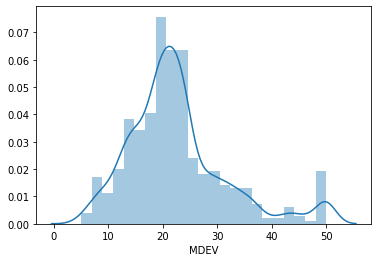

In [5]:
# histogram MDEV
sns.distplot(boston['MDEV'])

MDEV appears to be normally distributed, but slightly skewed to the high end. 

It's worth noting that there must have been a cap of 50.0 for MDEV values and these must include values above 50.0 as there were 16 MDEV's of this value. The next most frequent MDEV to appear was 25.0 and there was only 8 of these. 

The frequency of each unique value in MDEV was calculated below:

In [6]:
# get the frequency each unique values appears in MDEV
boston['MDEV'].value_counts().sort_values()

13.0     1
28.0     1
33.0     1
14.2     1
16.0     1
        ..
22.0     7
21.7     7
23.1     7
25.0     8
50.0    16
Name: MDEV, Length: 229, dtype: int64

Next I will look at the realtionship between each of the independent variabes in the dataset and MDEV. In the heatmap below values with a corrleation coefficient (cc)close to 1 have a strong positive correlation; those values close to -1 have a strong negative correlation ie when these go up MDEV goes down and vice-versa.

The variables mostly appear to the have relationships we would expect with MDEV. 

Structural Variables:  
RM, represents spaciousness (the average number of rooms per owner unit) has a strongly positive correlation with house values of 0.7, bigger houses are worth more. Age is the proportion of houses over 30 years old. Age is related to the structual quality of homes. It is as expected negatively correlated with house values though not as strongly as RM.

CRIM:  -.39;  INDUS  -.48;  TAX  -.47;  PTRATIO  -.51  LSTAT:  -.74



Neigbourhood Varialbes positvely correlated with MDEV:  
ZN   .36  CHAS   .18  B   .33


A higher crime rate, proportion of 
industry, nitric oxide concentration, proportion of older owner-occupied properties all have a negative impact on 
median prices. Where as 



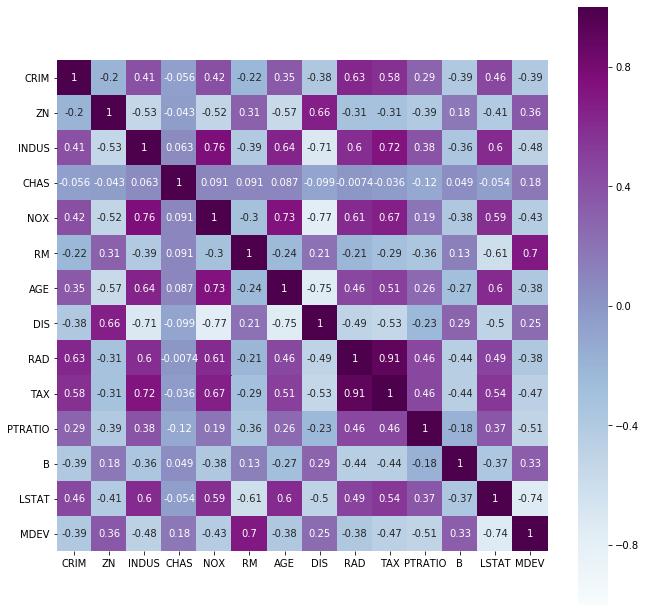

In [7]:
# heatmap
corr = boston.corr()
plt.figure(figsize=(11,11))
ax = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, cmap='BuPu', center=0,square=True, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [8]:
boston['ZN'].value_counts().sort_values()

18.0       1
17.5       1
100.0      1
82.5       2
85.0       2
34.0       3
70.0       3
52.5       3
55.0       3
28.0       3
35.0       3
75.0       3
33.0       4
60.0       4
21.0       4
95.0       4
90.0       5
30.0       6
45.0       6
40.0       7
25.0      10
22.0      10
12.5      10
80.0      15
20.0      21
0.0      372
Name: ZN, dtype: int64

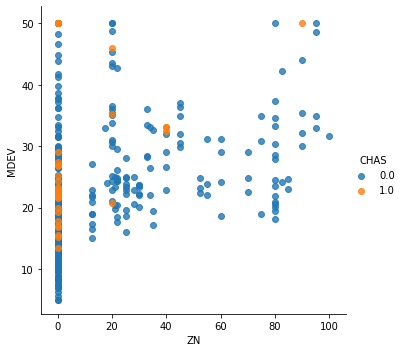

In [9]:
# Plot BMI classification by gender
sns.lmplot('ZN', 'MDEV', data=boston, fit_reg=False, hue='CHAS')

In [10]:
The attributes mostly appear to the have relationships we would expect with PRICE. A higher crime rate, proportion of 
industry, nitric oxide concentration, proportion of older owner-occupied properties all have a negative impact on 
median prices. Where as 



Focusing on the attributes strongly correlated with price we will take a closer look at LSTAT, RM, INDUS and PTRATIO.

SyntaxError: invalid syntax (<ipython-input-10-f412973ec1b5>, line 1)

In [ ]:
#boxplot method extracted from https://www.kaggle.com/prasadperera/the-boston-housing-dataset
keyVar = boston[['LSTAT','RM','INDUS','PTRATIO','MDEV']]
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
for k,v in keyVar.items():
    sns.boxplot(y=k, data=keyVar, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In the table below we can see summary statisitics for each attribute in the dataset.

In [ ]:
boston.describe().T

In [ ]:
sns.pairplot(keyVar)

Next I will look at the realtionship between each of the attributes in the dataset and PRICE. In the heatmap below values with a corrleation coefficient close to 1 have a strong positive correlation; those values close to -1 have a strong negative correlation.

In [ ]:
corr = boston.corr()
plt.figure(figsize=(11,11))
ax = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, cmap='BuPu', center=0,square=True, xticklabels=corr.columns.values,yticklabels=corr.columns.values )


The attributes mostly appear to the have relationships we would expect with PRICE. 


A higher crime rate, proportion of 
industry, nitric oxide concentration, proportion of older owner-occupied properties all have a negative impact on 
median prices. 



Focusing on the attributes strongly correlated with price we will take a closer look at LSTAT, RM, INDUS and PTRATIO.

Check the relationship between the variables in the dataset and their impact on the prices

## 2 . Is There A Significant difference In Median House Prices Between Those On The Charles And Those Not On The Charles River?

The attribute CHAS is a boolean those on the Charles river have a value of one and those areas not on the Charles have a 
value of 0. For simplicity I have created 2 new datasets from the Boston Housing dataset above: 

OnCharles - contains those areas along the Charles river. There are 35 areas in this dataset. The median MDEV is 23.3 and the mean is 28.4.
NotOnCharles - contains all areas that don't bound the Charles river. There are 471 of these. The median value for MDEV is 20.9 and the mean is 22.1.

First let's look at MDEV:

In the cell below I have created two boxplots to visualise the median house prices. From the plots and the means and medians of MDEV of each dataset it appears to be evident that owner-occupied houses in the areas along the river have higher prices. This is as we would expect as in most cities there is a nicer quality of life living along the river, and neighbourhoods are often more expensive.

In [ ]:
#Split the boston dataset into 2 new dataframes one containing the areas on the Charles and the other those 
#areas not on the Charles
onCharles = boston[boston['CHAS']==1]
notOnCharles = boston[boston['CHAS']==0]

# Create two boxplots side by side of the MDEV for houses on the Charles and those not on the Charles
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
index = 0
axs = axs.flatten()
sns.boxplot(y=notOnCharles['MDEV'], ax=axs[0]).set_title("Not on the Charles")
sns.boxplot(y=onCharles['MDEV'], ax=axs[1]).set_title("On the Charles")

In [ ]:
onCharles['MDEV'].describe()

In [ ]:
 notOnCharles['MDEV'].describe()

#### Significant difference?

There appears to a difference in MDEV,  I need to use inferential statistics to determine whether there is a significant difference. I am attempting to draw inferences beyond the data in the dataset. To determine how to check this statistically, I need to first look at MDEV.

MDEV:

Which is the best test to use?
Possible tests I could use to check this are:
 1. bad
 2. good
 3. dont
 4. care
 
 independent t test
 
 Checking assumptions:
     1. The dependent variable MDEV is measured on a continuous scale.
     2. OK - the independent varialbe CHAS consists of two categorical independent groups.
     3. OK - no participant of either group is in the other.
     4. 

In [ ]:
stats.shapiro(onCharles['MDEV'])

In [ ]:
stats.shapiro(notOnCharles['MDEV'])

In [ ]:
sns.pairplot(boston, hue='CHAS')


In [ ]:
# Create two subplots sharing y axis
# fig, (ax1, ax2) = plt.subplots(2, sharey=True)

# ax1.plot(x1, y1, 'ko-')
# ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

# ax2.plot(x2, y2, 'r.-')
# ax2.set(xlabel='time (s)', ylabel='Undamped')

# plt.show()

## 3 . Creating a neural network to predict median house prices based on the other variables

#### Introduction 

In this section of the notebook I am going to use Keras to build a neural network, a machine learning model, to predict the MDEV based on the other variables in the dataset.

Keras is a library in python that helps to build a neural network. In this notebook Keras is sitting on top of and interfacing with Tensorflow to build the neural network. Keras acts as an interface with Tensorflow and makes the building of the neural network much easier. Neural networks are part of machine-learning. Machine-learning is a subset of AI. In machine learning a system is not programmed but trained. By presenting a computer with many examples relevant to a task it finds statistical structure in the examples that allow the system to come up with rules 

How does a nueral network work?







NN WHAT PARTS MADE UP OF

INITIAL ATTEMPT -- LOSS VALUE OF FUNCTION

NEW APPROACH

WHITENING DATA ?

LOSS...




In [ ]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

#### Best Neural Network Initial Testing

When I begain working on this section of the notebook I built a neural network arbitrarily, starting with a deep network with a lot of layers. Through much trial and error I came back to the network below, with 1 hidden layer, a small batch size and 900 epochs. The network is overfitted but achieves an mae of 

In [11]:
# build first neural network
m1 = kr.models.Sequential()
m1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
m1.add(kr.layers.Dense(units=64, activation='sigmoid',input_dim=13))
m1.add(kr.layers.Dense(units=1, activation='linear'))
# Build the model.
m1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
# inputs all independent variables in the dataset
inputs1 = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
# ouputs the dependent variable MDEV
outputs1 = boston['MDEV']
# Split the inputs and outputs into training and test sets.
inputs_train1, inputs_test1, outputs_train1, outputs_test1 = mod.train_test_split(inputs1, outputs1, test_size=0.8)
# Train network
m1.fit(inputs_train1, outputs_train1, epochs=900, batch_size=4)








Epoch 1/900





101/101 [==============================] - 5s 47ms/step - loss: 583.5182 - mean_absolute_error: 22.5614
Epoch 2/900
101/101 [==============================] - 0s 1ms/step - loss: 512.6968 - mean_absolute_error: 20.9100
Epoch 3/900
101/101 [==============================] - 0s 1ms/step - loss: 456.1796 - mean_absolute_error: 19.5269
Epoch 4/900
101/101 [==============================] - 0s 1ms/step - loss: 416.0793 - mean_absolute_error: 18.4626
Epoch 5/900
101/101 [==============================] - 0s 1ms/step - loss: 384.1231 - mean_absolute_error: 17.5450
Epoch 6/900
101/101 [==============================] - 0s 999us/step - loss: 355.2499 - mean_absolute_error: 16.7408
Epoch 7/900
101/101 [==============================] - 0s 1ms/step - loss: 323.4986 - mean_absolute_error: 15.7634
Epoch 8/900
101/101 [==============================] - 0s 1ms/step - loss: 282.8696 - mean_absolute_error: 14.4665
Epoch 9/900
101/101 [==============================] - 0s 1ms/ste

Epoch 51/900
101/101 [==============================] - 0s 954us/step - loss: 65.1323 - mean_absolute_error: 6.1124
Epoch 52/900
101/101 [==============================] - 0s 1ms/step - loss: 64.6671 - mean_absolute_error: 6.1030
Epoch 53/900
101/101 [==============================] - 0s 1ms/step - loss: 64.7079 - mean_absolute_error: 6.0982
Epoch 54/900
101/101 [==============================] - 0s 1ms/step - loss: 64.6479 - mean_absolute_error: 6.1387
Epoch 55/900
101/101 [==============================] - 0s 1ms/step - loss: 64.3126 - mean_absolute_error: 6.0967
Epoch 56/900
101/101 [==============================] - 0s 1ms/step - loss: 64.3096 - mean_absolute_error: 6.0671
Epoch 57/900
101/101 [==============================] - 0s 997us/step - loss: 63.6942 - mean_absolute_error: 6.0261
Epoch 58/900
101/101 [==============================] - 0s 1ms/step - loss: 63.9226 - mean_absolute_error: 6.0989
Epoch 59/900
101/101 [==============================] - 0s 1ms/step - loss: 62.9429 

101/101 [==============================] - 0s 1ms/step - loss: 49.1556 - mean_absolute_error: 4.9349
Epoch 123/900
101/101 [==============================] - 0s 1ms/step - loss: 49.0659 - mean_absolute_error: 5.0647
Epoch 124/900
101/101 [==============================] - 0s 1ms/step - loss: 47.6504 - mean_absolute_error: 4.8343
Epoch 125/900
101/101 [==============================] - 0s 1ms/step - loss: 48.1452 - mean_absolute_error: 4.9133
Epoch 126/900
101/101 [==============================] - 0s 1ms/step - loss: 46.8835 - mean_absolute_error: 4.8205
Epoch 127/900
101/101 [==============================] - 0s 1ms/step - loss: 46.3711 - mean_absolute_error: 4.7886
Epoch 128/900
101/101 [==============================] - 0s 1ms/step - loss: 45.7494 - mean_absolute_error: 4.8029
Epoch 129/900
101/101 [==============================] - 0s 1ms/step - loss: 45.6828 - mean_absolute_error: 4.7145
Epoch 130/900
101/101 [==============================] - 0s 1ms/step - loss: 45.2643 - mean_ab

101/101 [==============================] - 0s 1ms/step - loss: 30.7099 - mean_absolute_error: 3.6843
Epoch 194/900
101/101 [==============================] - 0s 1ms/step - loss: 30.7269 - mean_absolute_error: 3.6242
Epoch 195/900
101/101 [==============================] - 0s 1ms/step - loss: 30.2510 - mean_absolute_error: 3.6454
Epoch 196/900
101/101 [==============================] - 0s 1ms/step - loss: 30.7160 - mean_absolute_error: 3.7155
Epoch 197/900
101/101 [==============================] - 0s 1ms/step - loss: 30.1985 - mean_absolute_error: 3.6173
Epoch 198/900
101/101 [==============================] - 0s 1ms/step - loss: 31.5548 - mean_absolute_error: 3.7372
Epoch 199/900
101/101 [==============================] - 0s 1ms/step - loss: 29.8966 - mean_absolute_error: 3.6122
Epoch 200/900
101/101 [==============================] - 0s 1ms/step - loss: 30.7218 - mean_absolute_error: 3.6949
Epoch 201/900
101/101 [==============================] - 0s 1ms/step - loss: 30.0731 - mean_ab

101/101 [==============================] - 0s 1ms/step - loss: 22.5610 - mean_absolute_error: 3.0163
Epoch 265/900
101/101 [==============================] - 0s 897us/step - loss: 23.2445 - mean_absolute_error: 3.0969
Epoch 266/900
101/101 [==============================] - 0s 2ms/step - loss: 23.3782 - mean_absolute_error: 3.1281
Epoch 267/900
101/101 [==============================] - 0s 1ms/step - loss: 30.5334 - mean_absolute_error: 3.9083
Epoch 268/900
101/101 [==============================] - 0s 1ms/step - loss: 23.7290 - mean_absolute_error: 3.1448
Epoch 269/900
101/101 [==============================] - 0s 1ms/step - loss: 22.4072 - mean_absolute_error: 3.0395
Epoch 270/900
101/101 [==============================] - 0s 1ms/step - loss: 23.4595 - mean_absolute_error: 3.1902
Epoch 271/900
101/101 [==============================] - 0s 1ms/step - loss: 22.5583 - mean_absolute_error: 3.0537
Epoch 272/900
101/101 [==============================] - 0s 1ms/step - loss: 22.2654 - mean_

101/101 [==============================] - 0s 1ms/step - loss: 19.8524 - mean_absolute_error: 2.8699
Epoch 336/900
101/101 [==============================] - 0s 871us/step - loss: 20.1356 - mean_absolute_error: 2.8742
Epoch 337/900
101/101 [==============================] - 0s 1ms/step - loss: 18.9133 - mean_absolute_error: 2.6883
Epoch 338/900
101/101 [==============================] - 0s 1ms/step - loss: 19.0624 - mean_absolute_error: 2.7473
Epoch 339/900
101/101 [==============================] - 0s 1ms/step - loss: 18.8203 - mean_absolute_error: 2.7132
Epoch 340/900
101/101 [==============================] - 0s 1ms/step - loss: 18.8802 - mean_absolute_error: 2.7033
Epoch 341/900
101/101 [==============================] - 0s 1ms/step - loss: 19.8486 - mean_absolute_error: 2.7945
Epoch 342/900
101/101 [==============================] - 0s 1ms/step - loss: 19.1382 - mean_absolute_error: 2.7366
Epoch 343/900
101/101 [==============================] - 0s 1ms/step - loss: 18.5280 - mean_

101/101 [==============================] - 0s 1ms/step - loss: 15.8487 - mean_absolute_error: 2.4890
Epoch 407/900
101/101 [==============================] - 0s 1ms/step - loss: 16.0082 - mean_absolute_error: 2.4694
Epoch 408/900
101/101 [==============================] - 0s 1ms/step - loss: 15.8095 - mean_absolute_error: 2.4645
Epoch 409/900
101/101 [==============================] - 0s 967us/step - loss: 17.5636 - mean_absolute_error: 2.6599
Epoch 410/900
101/101 [==============================] - 0s 1ms/step - loss: 18.4657 - mean_absolute_error: 2.7690
Epoch 411/900
101/101 [==============================] - 0s 1ms/step - loss: 17.1653 - mean_absolute_error: 2.5925
Epoch 412/900
101/101 [==============================] - 0s 1ms/step - loss: 16.2732 - mean_absolute_error: 2.5071
Epoch 413/900
101/101 [==============================] - 0s 1ms/step - loss: 16.1943 - mean_absolute_error: 2.5101
Epoch 414/900
101/101 [==============================] - 0s 1ms/step - loss: 15.3707 - mean_

101/101 [==============================] - 0s 1ms/step - loss: 13.8158 - mean_absolute_error: 2.3133
Epoch 477/900
101/101 [==============================] - 0s 1ms/step - loss: 14.0608 - mean_absolute_error: 2.3657
Epoch 478/900
101/101 [==============================] - 0s 1ms/step - loss: 13.6274 - mean_absolute_error: 2.3623
Epoch 479/900
101/101 [==============================] - 0s 1ms/step - loss: 13.9639 - mean_absolute_error: 2.4550
Epoch 480/900
101/101 [==============================] - 0s 1ms/step - loss: 13.9493 - mean_absolute_error: 2.2994
Epoch 481/900
101/101 [==============================] - 0s 1ms/step - loss: 13.8305 - mean_absolute_error: 2.3664
Epoch 482/900
101/101 [==============================] - 0s 1ms/step - loss: 13.1758 - mean_absolute_error: 2.3136
Epoch 483/900
101/101 [==============================] - 0s 1ms/step - loss: 13.5498 - mean_absolute_error: 2.3522
Epoch 484/900
101/101 [==============================] - 0s 1ms/step - loss: 13.6040 - mean_ab

101/101 [==============================] - 0s 1ms/step - loss: 11.6700 - mean_absolute_error: 2.2070
Epoch 548/900
101/101 [==============================] - 0s 1ms/step - loss: 11.7172 - mean_absolute_error: 2.2202
Epoch 549/900
101/101 [==============================] - 0s 1ms/step - loss: 11.4798 - mean_absolute_error: 2.1601
Epoch 550/900
101/101 [==============================] - 0s 1ms/step - loss: 12.0791 - mean_absolute_error: 2.2819
Epoch 551/900
101/101 [==============================] - 0s 964us/step - loss: 11.9037 - mean_absolute_error: 2.2444
Epoch 552/900
101/101 [==============================] - 0s 1ms/step - loss: 11.5420 - mean_absolute_error: 2.1911
Epoch 553/900
101/101 [==============================] - 0s 1ms/step - loss: 12.0765 - mean_absolute_error: 2.2248
Epoch 554/900
101/101 [==============================] - 0s 1ms/step - loss: 12.6556 - mean_absolute_error: 2.3698
Epoch 555/900
101/101 [==============================] - 0s 1ms/step - loss: 11.6906 - mean_

101/101 [==============================] - 0s 1ms/step - loss: 10.5463 - mean_absolute_error: 2.1236
Epoch 619/900
101/101 [==============================] - 0s 1ms/step - loss: 10.5073 - mean_absolute_error: 2.1267
Epoch 620/900
101/101 [==============================] - 0s 1ms/step - loss: 11.0622 - mean_absolute_error: 2.3111
Epoch 621/900
101/101 [==============================] - 0s 2ms/step - loss: 10.7480 - mean_absolute_error: 2.2151
Epoch 622/900
101/101 [==============================] - 0s 1ms/step - loss: 10.4075 - mean_absolute_error: 2.1418
Epoch 623/900
101/101 [==============================] - 0s 1ms/step - loss: 11.2995 - mean_absolute_error: 2.2813
Epoch 624/900
101/101 [==============================] - 0s 1ms/step - loss: 11.6967 - mean_absolute_error: 2.2116
Epoch 625/900
101/101 [==============================] - 0s 1ms/step - loss: 10.7889 - mean_absolute_error: 2.2533
Epoch 626/900
101/101 [==============================] - 0s 1ms/step - loss: 12.5913 - mean_ab

101/101 [==============================] - 0s 1ms/step - loss: 9.5597 - mean_absolute_error: 2.0917
Epoch 690/900
101/101 [==============================] - 0s 1ms/step - loss: 10.0844 - mean_absolute_error: 2.0605
Epoch 691/900
101/101 [==============================] - 0s 997us/step - loss: 8.5559 - mean_absolute_error: 1.8907
Epoch 692/900
101/101 [==============================] - 0s 1ms/step - loss: 8.6885 - mean_absolute_error: 1.8695
Epoch 693/900
101/101 [==============================] - 0s 1ms/step - loss: 13.3763 - mean_absolute_error: 2.5005
Epoch 694/900
101/101 [==============================] - 0s 1ms/step - loss: 10.3818 - mean_absolute_error: 2.3418
Epoch 695/900
101/101 [==============================] - 0s 1ms/step - loss: 10.4070 - mean_absolute_error: 2.2374
Epoch 696/900
101/101 [==============================] - 0s 1ms/step - loss: 10.3704 - mean_absolute_error: 2.2388
Epoch 697/900
101/101 [==============================] - 0s 1ms/step - loss: 9.4649 - mean_abso

101/101 [==============================] - 0s 1ms/step - loss: 8.2413 - mean_absolute_error: 1.9099
Epoch 761/900
101/101 [==============================] - 0s 1ms/step - loss: 7.9244 - mean_absolute_error: 1.8944
Epoch 762/900
101/101 [==============================] - 0s 1ms/step - loss: 7.9909 - mean_absolute_error: 1.8773
Epoch 763/900
101/101 [==============================] - 0s 1ms/step - loss: 8.2945 - mean_absolute_error: 2.0001
Epoch 764/900
101/101 [==============================] - 0s 878us/step - loss: 7.9430 - mean_absolute_error: 1.8826
Epoch 765/900
101/101 [==============================] - 0s 1ms/step - loss: 8.1226 - mean_absolute_error: 1.8935
Epoch 766/900
101/101 [==============================] - 0s 1ms/step - loss: 12.7447 - mean_absolute_error: 2.5276
Epoch 767/900
101/101 [==============================] - 0s 1ms/step - loss: 9.2436 - mean_absolute_error: 2.0322
Epoch 768/900
101/101 [==============================] - 0s 1ms/step - loss: 10.0879 - mean_absolut

101/101 [==============================] - 0s 1ms/step - loss: 7.0040 - mean_absolute_error: 1.7886
Epoch 832/900
101/101 [==============================] - 0s 1ms/step - loss: 7.3820 - mean_absolute_error: 1.8360
Epoch 833/900
101/101 [==============================] - 0s 1ms/step - loss: 7.5194 - mean_absolute_error: 1.8702
Epoch 834/900
101/101 [==============================] - 0s 1ms/step - loss: 9.7549 - mean_absolute_error: 2.2925
Epoch 835/900
101/101 [==============================] - 0s 1ms/step - loss: 7.8652 - mean_absolute_error: 2.0349
Epoch 836/900
101/101 [==============================] - 0s 1ms/step - loss: 10.1016 - mean_absolute_error: 2.1052
Epoch 837/900
101/101 [==============================] - 0s 1ms/step - loss: 10.5488 - mean_absolute_error: 2.1845
Epoch 838/900
101/101 [==============================] - 0s 1ms/step - loss: 7.7484 - mean_absolute_error: 1.9700
Epoch 839/900
101/101 [==============================] - 0s 1ms/step - loss: 7.6977 - mean_absolute_

In [16]:
p = m1.predict(inputs_test1)
p

array([[15.826514 ],
       [17.776285 ],
       [25.215958 ],
       [24.300718 ],
       [19.745651 ],
       [20.539997 ],
       [18.711432 ],
       [23.297533 ],
       [26.71195  ],
       [18.803986 ],
       [26.65872  ],
       [12.950187 ],
       [18.081018 ],
       [13.061814 ],
       [27.773937 ],
       [20.530096 ],
       [20.079252 ],
       [18.048183 ],
       [36.875717 ],
       [22.164202 ],
       [17.699366 ],
       [17.442575 ],
       [15.756322 ],
       [19.964231 ],
       [13.2130375],
       [25.402409 ],
       [40.626545 ],
       [13.137378 ],
       [21.491795 ],
       [26.013102 ],
       [39.864357 ],
       [19.803446 ],
       [13.062267 ],
       [18.068838 ],
       [13.202656 ],
       [18.422003 ],
       [18.077993 ],
       [13.152619 ],
       [21.600758 ],
       [41.24234  ],
       [22.556894 ],
       [21.401464 ],
       [35.493595 ],
       [20.164206 ],
       [23.156092 ],
       [18.181385 ],
       [13.319955 ],
       [26.80

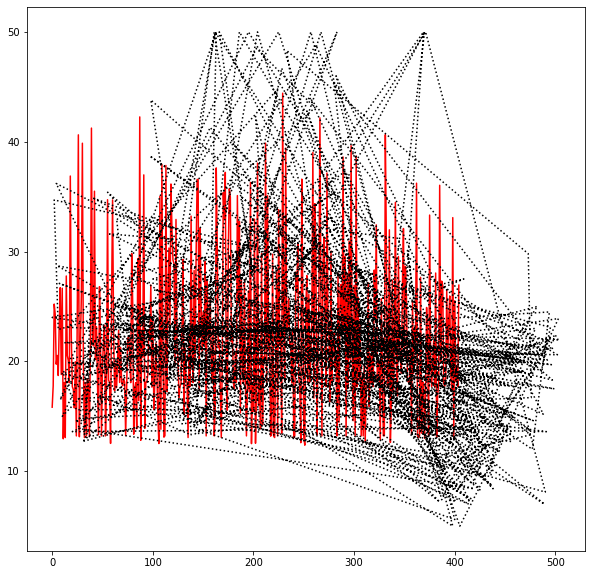

In [14]:
# Graph performance on test data
plt.rcParams['figure.figsize'] = (10, 10)
p = m1.predict(inputs_test1)
plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs_test1, 'k:', label='Original')

### Build Keras Model

In [ ]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 100 neurons and an input layer with 13 .
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))

model.add(kr.layers.Dense(units=100, activation='linear', input_dim=5))
model.add(kr.layers.Dense(units=100, activation='linear'))
model.add(kr.layers.Dense(units=100, activation='sigmoid'))
model.add(kr.layers.Dense(units=100, activation='linear' ))
model.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['accuracy'])

In [ ]:
boston.iloc[0,:]

In [ ]:
inputs = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
#inputs = boston[['CRIM','NOX','ZN','PTRATIO','LSTAT']]

In [ ]:
outputs = boston['MDEV']
outputs

In [ ]:


# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)
#inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)



In [ ]:
m.fit(inputs_train, outputs_train, epochs=20, batch_size=15)

### Train

In [ ]:
# Train the neural network.
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10)
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10) loss 72
#model.fit(inputs_train, outputs_train, epochs=32, batch_size=10)

#### Plot

In [ ]:

plt.rcParams['figure.figsize'] = (10, 10)
# all values through the model
#p = model.predict(inputs)
p = m.predict(inputs)
# Plot the values.

plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k:', label='Original')
plt.legend()

In [ ]:
References

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air',

This course
Books
Deep Learning with Python Jason Brownlee
Deep Learning Tutorial Steve Nouri
https://keras.io keras documentation 
    
https://medium.com/@himanshuxd/the-guide-to-rigorous-descriptive-statistics-for-machine-learning-and-data-science-9209f88e4363


## References

I.  Hedonic Housing Prices and the Demand for Clean Air 1976  [JOURNAL OF ENVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf)

II.  Ai Hadar: Method used to import the dataset [Medium.com](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef)

III. CSO - [Ages of children in first class] (https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDA42&PLanguage=0)

IV. Heights [UK WHO growth chart boys](https://www.rcpch.ac.uk/sites/default/files/Boys_2-18_years_growth_chart.pdf)

V. Heights [UK WHO growth chart girls](https://www.rcpch.ac.uk/sites/default/files/Girls_2-18_years_growth_chart.pdf)

VI. Heights [Growth monitoring resources](https://www.hse.ie/eng/health/child/growthmonitoring/)

VII. Heights [Normally distributed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2831262/#b27-dem-46-0001)

VIII. BMI Wiki [BMI Wiki](https://en.wikipedia.org/wiki/Body_mass_index)

IX. WHO BMI Boys [Boys BMI](https://www.who.int/growthref/sft_bmifa_boys_z_5_19years.pdf?ua=1) 

x. WHO BMI Girls [Girls BMI](https://www.who.int/growthref/sft_bmifa_girls_z_5_19years.pdf?ua=1) 

XI. BMI distribution curve [BMI distribution](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/)